# **Used Car Price Prediction Using Neural Networks**

## **Importing the Necessary Libraries**

In [3]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.0-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl (189 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.0-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl (56 kB)
Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl (2.5 MB)
Usi

In [5]:
pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl (45.9 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
import warnings

warnings.filterwarnings("ignore")
print("Importation Complete")


## **Data Importation and Preprocessing**

In this section, I will be importing the dataset, performing data exploration, checking for missing values nad wrong column data types and correcting them.

In [8]:
#importing the given dataset
df_train = pd.read_csv("C:\\Used Car Prediction Neural Networks\\KaggleX-Skills-Assessment-Challenge\\train.csv") #training dataset
df_test = pd.read_csv("C:\\Used Car Prediction Neural Networks\\KaggleX-Skills-Assessment-Challenge\\test.csv")  #test dataset

In [9]:
#checking the first five rows of our training dataset
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [10]:
#getting the firs five rows of our test dataset
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [11]:
#getting the shape of our training data
df_train.shape

(54273, 13)

In [12]:
#getting the shape of our test data
df_test.shape

(36183, 12)

In [13]:
#getting the information summary on our training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [14]:
#getting the information summary on our test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            36183 non-null  int64 
 1   brand         36183 non-null  object
 2   model         36183 non-null  object
 3   model_year    36183 non-null  int64 
 4   milage        36183 non-null  int64 
 5   fuel_type     36183 non-null  object
 6   engine        36183 non-null  object
 7   transmission  36183 non-null  object
 8   ext_col       36183 non-null  object
 9   int_col       36183 non-null  object
 10  accident      36183 non-null  object
 11  clean_title   36183 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.3+ MB


In [15]:
#checking for missing values
df_train.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [16]:
#checking for our test data
df_test.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

**No missing values**

In [17]:
#getting the descriptive summary of our training dataset
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,54273.0,27136.000000,15667.409917,0.0,13568.0,27136.0,40704.0,54272.0
model_year,54273.0,2015.091979,5.588909,1974.0,2012.0,2016.0,2019.0,2024.0
milage,54273.0,72746.175667,50469.490448,100.0,32268.0,66107.0,102000.0,405000.0
price,54273.0,39218.443333,72826.335535,2000.0,15500.0,28000.0,45000.0,2954083.0


**The standard deviation for our target variable price is far above the mean which means that there is high variability in the price of the used cars**

In [18]:
#checking for the unique values in our training dataset
df_train.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

In [19]:
df_test.nunique()

id              36183
brand              53
model            1791
model_year         34
milage           2973
fuel_type           7
engine           1038
transmission       44
ext_col           230
int_col           111
accident            2
clean_title         1
dtype: int64

From the above we can see the number of unique values in each columns. Looking closely at the following categorical columns: `model_year,brand, fuel_type, transmission and accident` we can observe that the distribution will be easier to visualize.

In [20]:
#splitting our dataset into numerical and categorical columns
num = df_train.select_dtypes(include = "number").columns.tolist()
cat = df_train.select_dtypes(include = "object").columns.tolist()

In [21]:
print("These are the numerical columns: ", num)
print("These are the categorical columns: ", cat)

These are the numerical columns:  ['id', 'model_year', 'milage', 'price']
These are the categorical columns:  ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


In [22]:
#checking the skewness of our numerical columns
for column in num:
    skew = df_train[column].skew()
    print(f"The skewness of {column} is: ", skew)

The skewness of id is:  0.0
The skewness of model_year is:  -0.9405153557112128
The skewness of milage is:  0.8563662187718417
The skewness of price is:  23.62897359328672


When it comes to skewness using the pandas function `skew()`, there is a yardstick to follow:

* If the value of skewness is 0 or very close to zero then it is a normal distribution
* If the value of skewness is positive then it is skewed to the right
* If the value of skewness is negative then it is skewed to the left.

Using the above yardstick, our Milage and Price columns are both right skewed, the Vehicle modely year column is left skewed.

## **Data Visualization**

### **Univariate Analysis**

In this section, we will be visualizing the distribution of single variables (Columns) in our dataset.

In [17]:
# #visualizing the model year column

# plt.figure(figsize=(20,9)) # Set the width and height of the figure
# year = df_train["model_year"].loc[:19]
# #bar chart showing the sale for each category
# sns.countplot(fuel["fuel_type"], palette="viridis")
# #title
# plt.title("Manufacturing Year of Vehicles")
# plt.xticks(rotation=90)
# #add labels
# plt.ylabel("Number of Vehicles")
# plt.xlabel("Year");

In [23]:
df_train["fuel_type"].value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
–                   294
Plug-In Hybrid      182
not supported         4
Name: count, dtype: int64

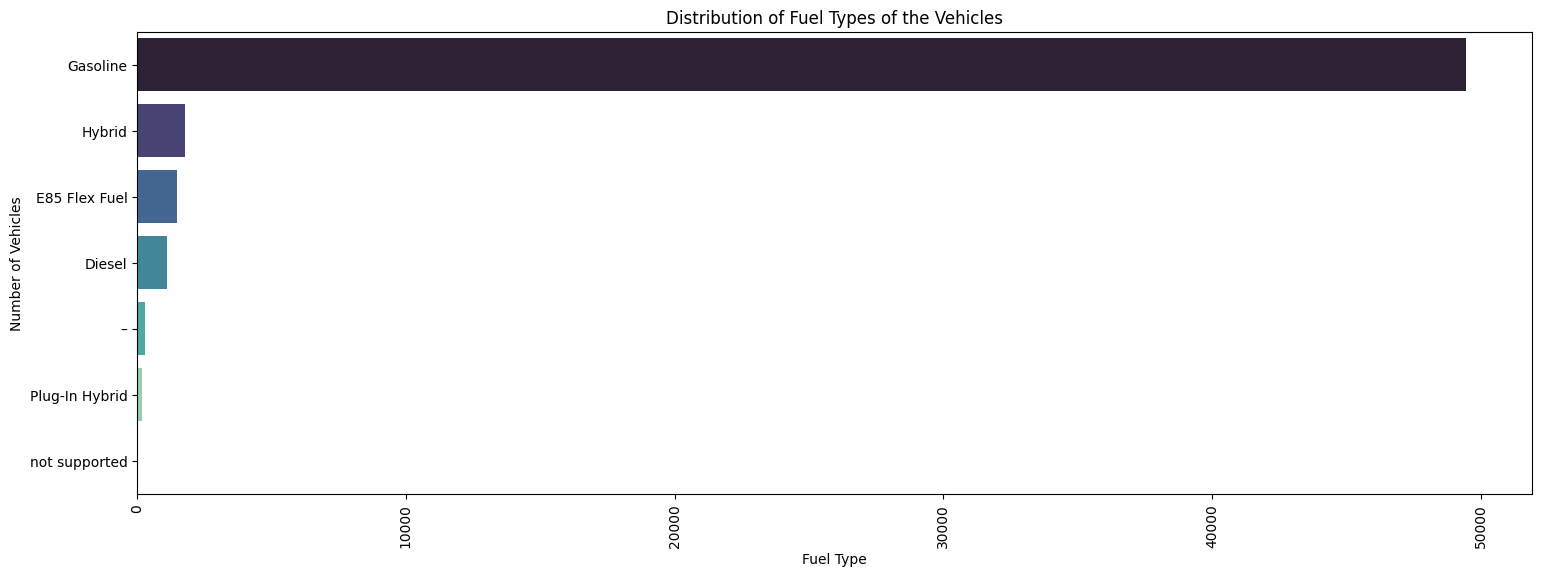

In [24]:
#visualizing fuel type of the used cars
plt.figure(figsize = (18,6))
palette = sns.color_palette("mako")
sns.countplot(df_train["fuel_type"], palette = palette)
plt.xlabel("Fuel Type")
plt.xticks(rotation = 90)
plt.ylabel("Number of Vehicles")
plt.title("Distribution of Fuel Types of the Vehicles")
plt.show();

**Inference:** The most used fuel type is Gasoline. Looking closely we can see that one fuel type doesn''t have a label and is represented with the "-" sign.

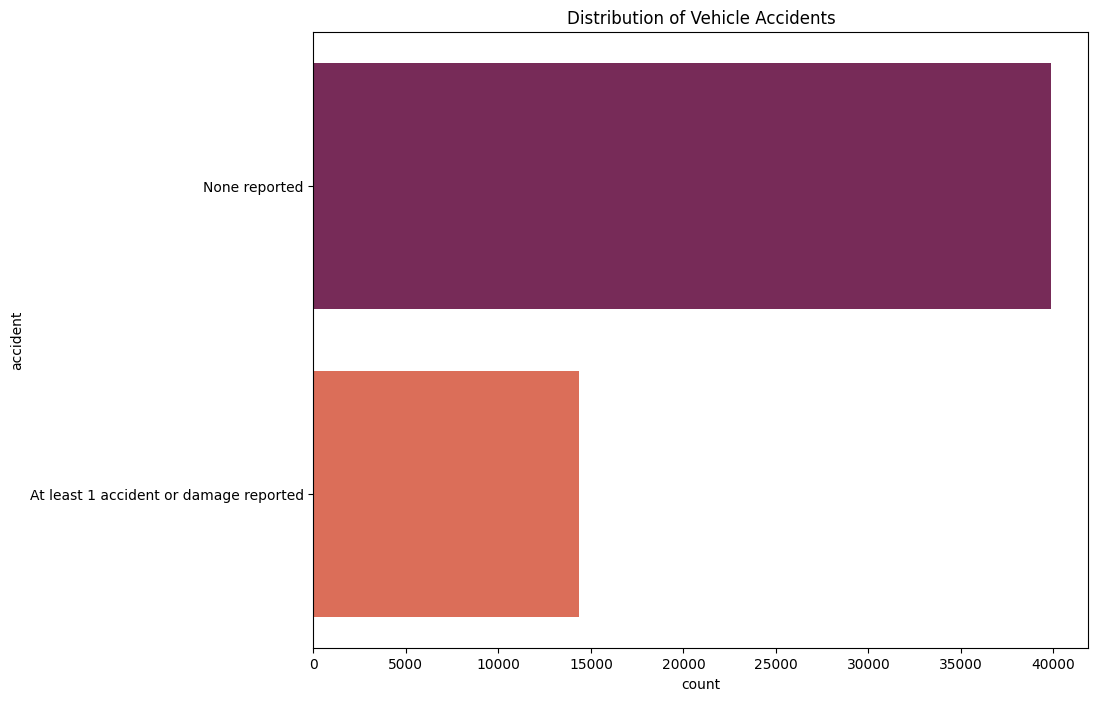

In [25]:
#visualing the distribution of accident column
plt.figure(figsize = (10,8))
sns.countplot(df_train["accident"], palette = "rocket")
plt.title("Distribution of Vehicle Accidents")
plt.show();

**Inference:** Most of the vehicles have had no accidents

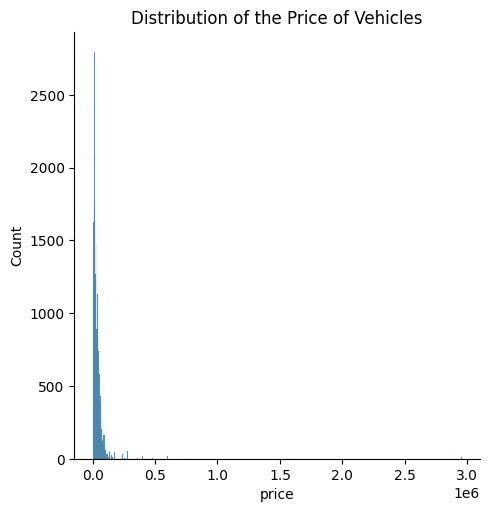

In [26]:
#visualizing the distribution of our target variable
sns.displot(df_train, x = "price")
plt.title("Distribution of the Price of Vehicles");

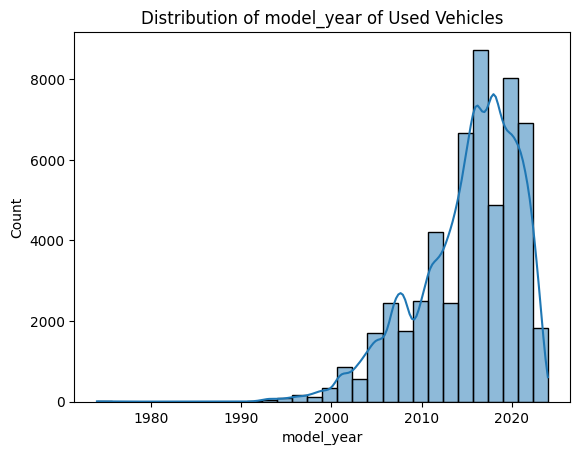

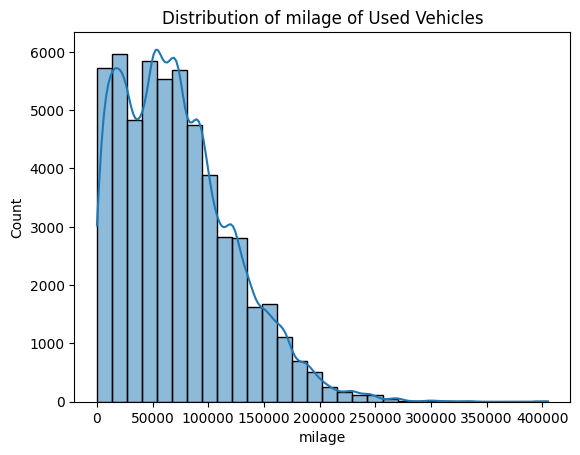

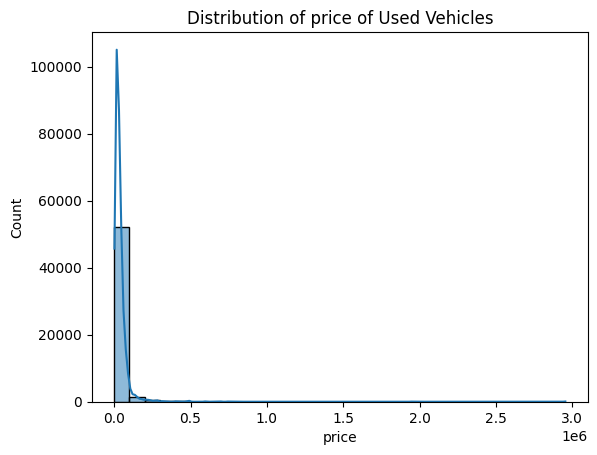

In [27]:
#visualizing all the numerical columns in our dataset
feat = df_train[num].drop("id", axis = 1)
for col in feat.columns:
    sns.histplot(data = feat, x = col, bins = 30, kde = True)
    plt.title(f"Distribution of {col} of Used Vehicles")
    plt.show();

### **Bivariate Analysis**

This stage is for visualizing the relationship between two variables.

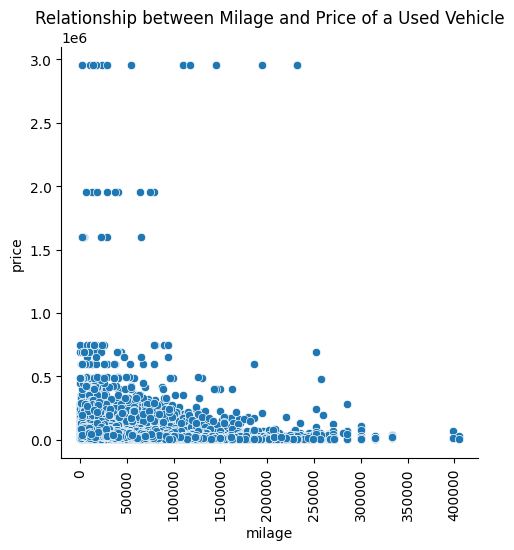

In [28]:
sns.relplot(data = df_train, x = "milage", y = "price")
plt.xticks(rotation = 90)
plt.title("Relationship between Milage and Price of a Used Vehicle");

### **Multivariate Analysis**

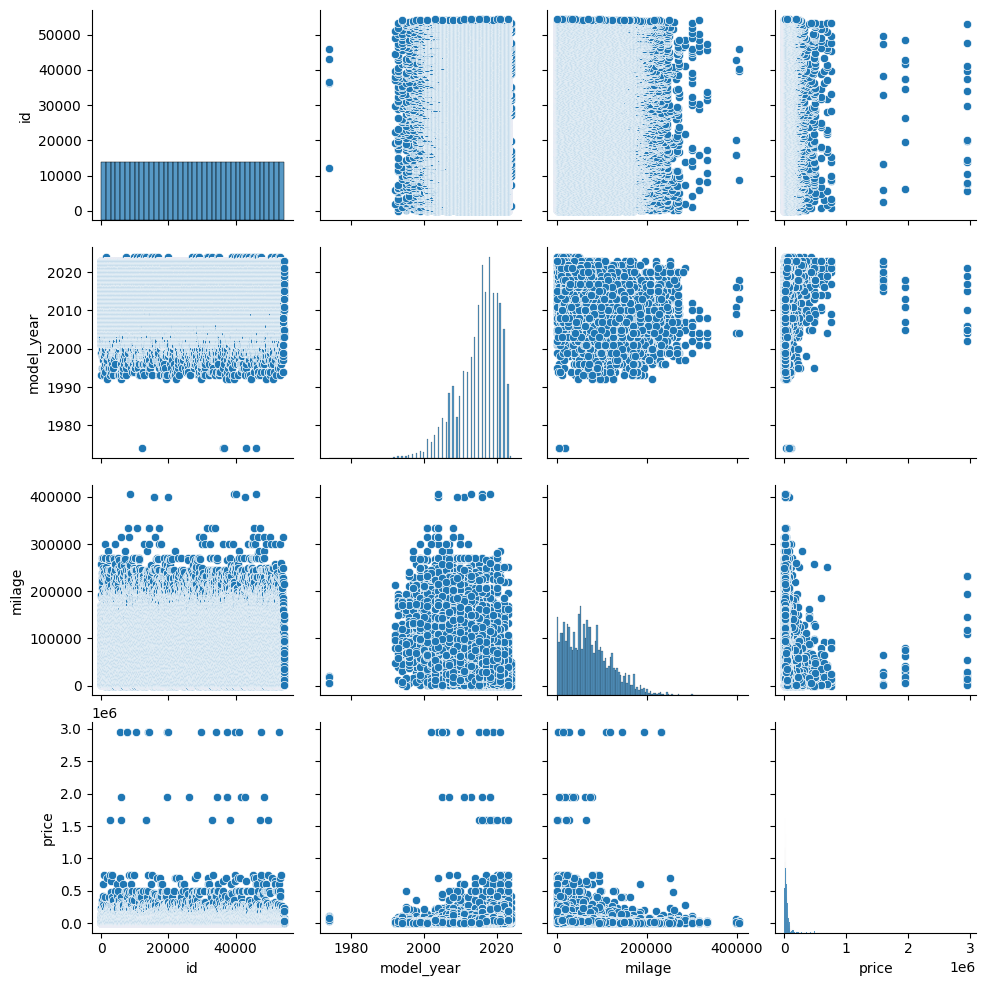

In [29]:
sns.pairplot(df_train);

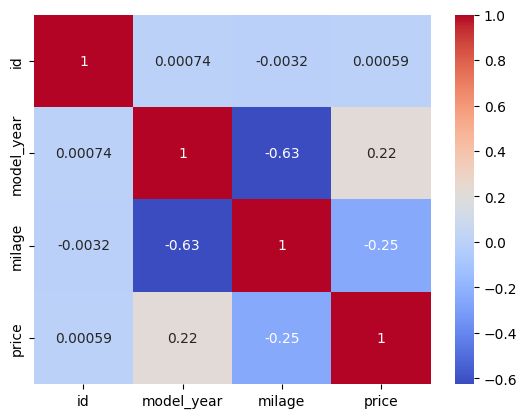

In [30]:
sns.heatmap(df_train.corr(numeric_only = True), annot = True, cmap = "coolwarm");

## **Model Building and Predictions**

In [31]:
# Define the transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [32]:
#merging our test and train data for easy scaling and encoding
df_test['price'] = None  # since our test dataset doen't have a price column like our train dataset I will create one
                         #with no values so we can easily merge the two datasets

In [33]:
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,None
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,None
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes,None
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,None
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,None


In [34]:
# Concatenate the dataframes
df_combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df_combined.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [35]:
df_combined.shape

(90456, 13)

In [36]:
#getting our numeric and categorical features
numeric = df_combined.drop(["id"], axis = 1).select_dtypes(include = "number").columns.tolist()
categorical = df_combined.drop(["price"],axis = 1).select_dtypes(include = "object").columns.tolist()

In [37]:
numeric

['model_year', 'milage']

In [38]:
categorical

['brand',
 'model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title']

In [39]:
scaler = StandardScaler()

#standardizing for our numeric training data
scaled = scaler.fit_transform(df_combined[numeric])


In [40]:
df_scaled = pd.DataFrame(scaled, columns=numeric)

In [41]:
#combining the scaled features with my original dataframe and dropping the previous ones
df = df_combined.drop(columns=numeric)
new_data = pd.concat([df_scaled ,df], axis = 1)

In [42]:
new_data.head()

,model_year,milage,id,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0.522314,0.033808,0,Ford,F-150 Lariat,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,-1.445825,0.145560,1,BMW,335 i,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,-1.087982,0.372801,2,Jaguar,XF Luxury,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,1.238001,-1.388293,3,BMW,X7 xDrive40i,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,-2.519356,0.758603,4,Pontiac,Firebird Base,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [43]:
#preparing our data
encoder = OneHotEncoder()
#for our train data
encoded = encoder.fit_transform(df_combined[categorical])

In [44]:
feature_names = encoder.get_feature_names_out(categorical) #getting the feature names

In [45]:
# Convert the encoded data to a DataFrame
encoded_cat = encoded.toarray()
encoded_cat_df = pd.DataFrame(encoded_cat, columns=feature_names)

#combining the encoded features with my original dataframe and dropping the previous ones
cat_df = new_data.drop(columns=categorical)
new_df = pd.concat([encoded_cat_df , cat_df], axis = 1)

In [46]:
new_df.head()

,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Yes,model_year,milage,id,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.522314,0.033808,0,11000
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,-1.445825,0.145560,1,8250
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,-1.087982,0.372801,2,15000
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.238001,-1.388293,3,63500
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,-2.519356,0.758603,4,7850


In [47]:
# Separate the combined dataframe back into training and test sets
df_train_processed = new_df[df_combined['price'].notna()].reset_index(drop=True)
df_test_processed = new_df[df_combined['price'].isna()].reset_index(drop=True)

In [48]:
#removing the price column from our test dataset
df_test_processed = df_test_processed.drop("price", axis = 1)

In [49]:
#dropping the id column from both our train and test dataset
df_train_processed = df_train_processed.drop("id", axis = 1)
df_test_processed = df_test_processed.drop("id", axis = 1)

In [50]:
#defining X_train and y_train
X_train = df_train_processed.drop("price", axis = 1)
y_train = df_train_processed["price"]

In [55]:
#further splitting into train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 42)

In [57]:
#converting our data into numpy array since our model works well with numpy array
X_train = np.array(X_train).astype("float32")
X_val = np.array(X_val).astype("float32")
y_train = np.array(y_train).astype("float32")
y_val = np.array(y_val).astype("float32")
X_test = np.array(df_test_processed).astype("float32")

In [ ]:
X_train

In [58]:
#initializing our model
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2)
    #output layer
    keras.layers.Dense(1, activation = "linear")
])

In [59]:
#model compilation
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["mean_squared_error"])

#model fitting
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 5176875520.0000 - mean_squared_error: 5176875520.0000 - val_loss: 7188103680.0000 - val_mean_squared_error: 7188103680.0000
Epoch 2/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 5976428032.0000 - mean_squared_error: 5976428032.0000 - val_loss: 7090000896.0000 - val_mean_squared_error: 7090000896.0000
Epoch 3/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2537922048.0000 - mean_squared_error: 2537922048.0000 - val_loss: 7042422784.0000 - val_mean_squared_error: 7042422784.0000
Epoch 4/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3062675712.0000 - mean_squared_error: 3062675712.0000 - val_loss: 7011661312.0000 - val_mean_squared_error: 7011661312.0000
Epoch 5/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4123121920.0000 - mean_squared_error: 4123121920.0000 - val_loss: 6986897920.0000 - val_mean_squared_error: 6986897920.0000
Epoch 6/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 32417620

In [60]:
#model evaluation on the validation set
val_loss, val_mse = model.evaluate(X_val, y_val)

#getting the root mean squared error
val_rmse = np.sqrt(val_mse)

print("Validation RMSE:", val_rmse)

272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5806663168.0000 - mean_squared_error: 5806663168.0000
Validation RMSE: 83067.34655687516


In [61]:
#making predictions on the test data
y_pred = model.predict(X_test)

1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [62]:
#saving my predictions to a submission file
submission = pd.DataFrame({'id': df_test['id'], 'price': y_pred.flatten()}) #using the flatten method to convert to a one dimensional array
submission.to_csv('submission.csv', index=False)
print('Submission file created successfully')

Submission file created successfully


In [ ]:
#saving my predictions to a submission file
submission = pd.DataFrame({'id': df_test['id'], 'price': y_pred.flatten()}) #using the flatten method to convert to a one dimensional array
submission.to_csv('submission_2.csv', index=False)
print('Second Submission file created successfully')